Radial Basis Function Networks

In [4]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # veriyi standardize eder, 0 ortalamalı, 1 std dağılıma oturtur
from sklearn.preprocessing import LabelBinarizer # etiketleri one hot-encoding formatına çevirmek için

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Layer ,Flatten
from tensorflow.keras import backend as K # keras backend API (tensor işlemleri için kullanılır)

import warnings
warnings.filterwarnings("ignore")

iris = load_iris()
X = iris.data
y = iris.target

# one hot encoding
label_binarizer = LabelBinarizer() # one hot-encoding formatına çeviren nesne
y_encoded = label_binarizer.fit_transform(y)

# standardize the data
scaler = StandardScaler() # veriyi standartlaştırmak için tanımlanan nesne
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [6]:
class RBFLayer(Layer):  # RBFLayer kerasın layer sınıfından miras (inheritance) alır
    def __init__(self, units, gamma, **kwargs):

        # constructor , katmanın genel ozelliklerini baslatmak için gereklidir

        super(RBFLayer, self).__init__(**kwargs) # layer sınıfınn init methodunu çağırır
        self.units = units #rbf katmanındaki nöron sayısı
        self.gamma = K.cast_to_floatx(gamma) # rbf fonksiyonundaki gamma param , float tipine dönüştürülür , duyarlılık parametresi

    def build(self, input_shape):

        # build methodu katmanın ağırlıklarını oluşturmak için kullanılır, bu method keras tarafından ilk defa bir input aldıgında otomatik olarak çağrılır
        
        # add_weight methodu ile ağırlıklar oluşturulur
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units), # agırlıkların boyutunu tanımlar,
                                  initializer='uniform', # agırlıklar baslangıc degerleri alabilir
                                  trainable=True) # agırlıklar egitilebilir
        super(RBFLayer, self).build(input_shape) # build methodu çağrılır
    
    def call(self, inputs):

        # call methodu layerın işlevini tanımlar

        diff = K.expand_dims(inputs) - self.mu # girdiye bir boyut ekler ve agırlıkların farkını alır
        l2 = K.sum(K.pow(diff, 2), axis=1) # farkların karesini alır ve satırlar boyunca toplar
        res = K.exp(-1 * self.gamma * l2) # rbf fonksiyonu
        return res
    
    def compute_output_shape(self, input_shape):

        # output shape belirler

        return (input_shape[0], self.units) # cıktının sekli 
    
RBFLayer(10,0.5)

<RBFLayer name=rbf_layer, built=False>

In [7]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(4,))) # giris verisini düzleştirir
    model.add(RBFLayer(10, 0.5)) # rbf ekle , 10 noron ve gamma 0.5
    model.add(Dense(3, activation='softmax')) 

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = build_model()
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.3594 - loss: 1.2835 - val_accuracy: 0.4000 - val_loss: 1.2761
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3165 - loss: 1.3130 - val_accuracy: 0.4000 - val_loss: 1.2622
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3417 - loss: 1.2736 - val_accuracy: 0.4000 - val_loss: 1.2486
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3410 - loss: 1.2486 - val_accuracy: 0.4000 - val_loss: 1.2355
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3531 - loss: 1.2412 - val_accuracy: 0.3333 - val_loss: 1.2226
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3477 - loss: 1.2294 - val_accuracy: 0.3333 - val_loss: 1.2099
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3373 - loss: 1.2044 - val_accuracy: 0.3333 - val_loss: 1.1976
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3546 - loss: 1.2176 - val_accuracy: 0.3333 - val_loss:

In [8]:
loss , acc = model.evaluate(X_test, y_test)
print("Loss : ",loss)
print("Accuracy : ",acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9000 - loss: 0.6924
Loss :  0.6923803091049194
Accuracy :  0.8999999761581421


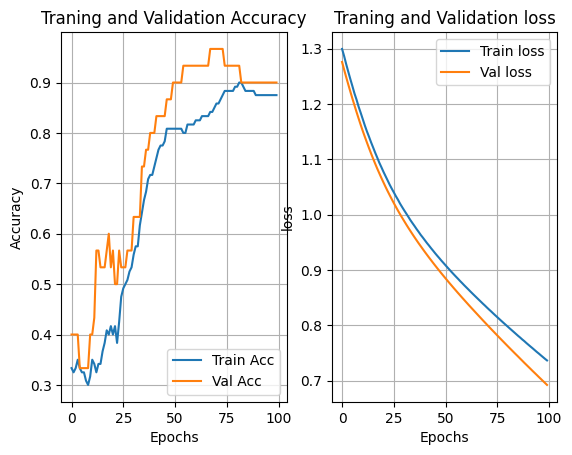

In [9]:
plt.figure()

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Traning and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('True')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title("Traning and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid('True')